In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from set_of_func import *

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
X_train_temp = np.vstack([img.reshape((28, 28)) for img in mnist.train.images])
Y_train_temp = mnist.train.labels
X_test_temp  = np.vstack([img.reshape(28, 28) for img in mnist.test.images])
Y_test_temp  = mnist.test.labels

del mnist
X_train = np.zeros([28, 28, int(X_train_temp.shape[0]/28)])

for iter in range(int(X_train_temp.shape[0]/28)):
    X_train[:, :, iter] = X_train_temp[iter*28:(iter+1)*28, :]

X_test = np.zeros([28, 28, int(X_test_temp.shape[0]/28)])
for iter in range(int(X_test_temp.shape[0]/28)):
    X_test[:, :, iter] = X_test_temp[iter*28:(iter+1)*28, :]

Y_train = np.transpose(Y_train_temp)
Y_test = np.transpose(Y_test_temp)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
def ReLU(x):
    mask  = (x >0) * 1.0
    return np.multiply(mask, x)

def der_ReLU(x):
    mask  = (x >0) * 1.0
    return np.matrix(mask)

def softmax(x):
    x = x/x.max()
    e_x = np.exp(x)
    return e_x / e_x.sum()

def pool_func(img):
    return img.max()

def cross_entropy(predictions, targets, epsilon=1e-5):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    ce = - np.mean(np.log(predictions) * targets) 
    return ce

def shuffle(x, y):
    indeces = np.array(range(x.shape[2]))
    temp_x = np.zeros(x.shape)
    temp_y = np.zeros(y.shape)
    np.random.shuffle(indeces)
    for iter in range(x.shape[2]):
        temp_x[:, :, indeces[iter]] = x[:, :, iter]
        temp_y[:, indeces[iter]] = y[:, iter]
    return x, y

In [4]:
################################################################################
##Initialize the sizes and weights for the conv_net
num_layers = 2
np.random.seed(100)
ker_nums_layer1 = 8
ker_nums_layer2 = 16

ker_nums = []
ker_nums.append(ker_nums_layer1)
ker_nums.append(ker_nums_layer2)

kernels = []

ker_dim_layer1 = 5
ker_dim_layer2 = 5

biases = []

for iter in range(ker_nums_layer1):
    kernels.append(np.random.uniform(-1e-2, 1e-2,size = [ker_dim_layer1, ker_dim_layer1]))
    biases.append(1)

for iter in range(ker_nums_layer2):
    kernels.append(np.random.uniform(-1e-2, 1e-2,size = [ker_dim_layer2, ker_dim_layer2, ker_nums_layer1]))
    biases.append(1)

strides = []
strides.append((1, 1))
strides.append((1, 1))

paddings = []
paddings.append('valid')
paddings.append('valid')

non_linear_funcs = []
non_linear_funcs.append(ReLU)
non_linear_funcs.append(ReLU)

pool_funcs = []
pool_funcs.append(pool_func)
pool_funcs.append(pool_func)

pool_windows = []
pool_windows.append((2, 2))
pool_windows.append((2, 2))

pool_strides = []
pool_strides.append((2, 2))
pool_strides.append((2, 2))
################################################################################
##Unravel weights setup
weight_dense = np.random.normal(size = [784, 1024])
bias_dense   = np.random.normal(size = [1024, 1])

num_layers = 2

layer_sizes = []
layer_sizes.append(1024)
layer_sizes.append(10)

weights = []
weights.append(weight_dense)
weights.append(np.random.normal(size = [1024, 10]))

bias = []
bias.append(bias_dense)
bias.append(np.random.normal(size = [10, 1]))

activation_funcs = []
activation_funcs.append(ReLU)
activation_funcs.append(linear_func)
################################################################################

0
10
plotting the first pooled image from the first layer


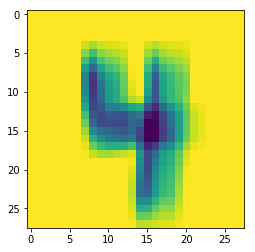

accuracy :  0.1
loss :  2.546031418640889
0
10
plotting the first pooled image from the first layer


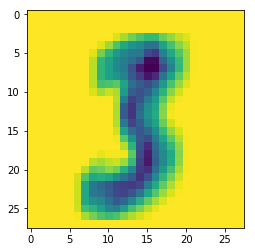

accuracy :  0.15
loss :  2.3200294491074205
0
10
plotting the first pooled image from the first layer


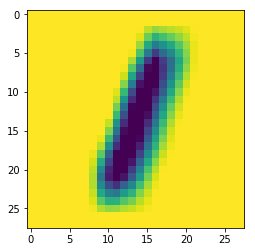

accuracy :  0.05
loss :  2.4222759970731236
0
10
plotting the first pooled image from the first layer


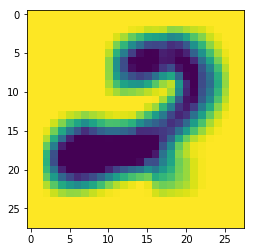

accuracy :  0.1
loss :  2.378720283809149
0
10
plotting the first pooled image from the first layer


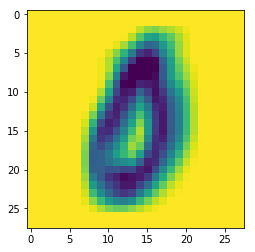

accuracy :  0.2
loss :  2.152345085381608
0
10
plotting the first pooled image from the first layer


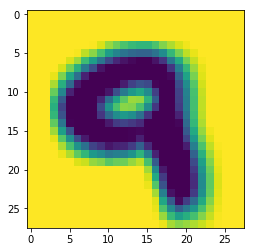

accuracy :  0.2
loss :  2.3462714511326404
0


KeyboardInterrupt: 

In [6]:
num_epoch = 15
num_img = 20
batch_size = 10
learning_rate = 0.00001
errors = []
errors_acc = []
errors_test = []
errors_acc_test = []
corrects = 0
mistakes = 0
accuracy = []
accuracy_test = []
corrects_test = 0
mistakes_test = 0
for iter3 in range(num_epoch):
    kernels_cc = kernels
    biases_cc = biases
    weights_mlp = weights
    bias_mlp = bias
    X_train_temp, Y_train_temp = shuffle(X_train, Y_train)
    X_test_temp, Y_test_temp = shuffle(X_test, Y_test)
    for iter4 in range(num_img):
        if(iter4%10==0):
            print(iter4)
        this_iter = np.random.randint(0, X_train.shape[2])
        this_img_in = np.zeros((28, 28, 1))
        this_img_in[:, :, 0] = X_train_temp[:, :, this_iter]
#         plt.imshow(this_img_in[:, :, 0])
#         plt.show()
        this_img_out = np.matrix(Y_train_temp[:, this_iter])
        this_img_out = np.transpose(this_img_out)

        img_conv_1 = (conv_layer(this_img_in, ker_nums_layer1, ReLU, kernels[0:ker_nums_layer1], biases[0:ker_nums_layer1], stride = (1, 1), pad = 'same'))
        img_pool_1 = pool_layer(img_conv_1, pool_func, (2, 2), (2, 2))

        img_conv_2 = (conv_layer(img_pool_1, ker_nums_layer2, ReLU, kernels[ker_nums_layer1:ker_nums_layer2+ker_nums_layer1], biases[ker_nums_layer1:ker_nums_layer2+ker_nums_layer1], stride = (1, 1), pad = 'same'))
        img_pool_2 = pool_layer(img_conv_2, pool_func, (2, 2), (2, 2))
        

        dense_1_in = np.transpose(np.matrix(img_pool_2.flatten()))
#         print(dense_1_in.shape)
        dense_1_out = activation_funcs[0](np.matmul(np.transpose(weights[0]), dense_1_in)+bias[0])
#         print(dense_1_out.shape)
        dense_2_out = activation_funcs[1](np.matmul(np.transpose(weights[1]), dense_1_out)+bias[1])
#         print(dense_2_out.shape)
        final_out = softmax(dense_2_out)

        grad_2_wt = np.matmul((np.matrix(final_out-this_img_out)), np.transpose(dense_1_out))
        grad_2_wt = np.transpose(grad_2_wt)
        grad_2_bi = (final_out-this_img_out)
        grad_2_pre = (final_out-this_img_out)

        grad_1_wt = np.matmul(np.multiply(np.matmul(weights[1], grad_2_pre), der_ReLU(dense_1_out)), np.transpose(dense_1_in))
        grad_1_wt = np.transpose(grad_1_wt)
        grad_1_bi = np.multiply(np.matmul(weights[1], grad_2_pre), der_ReLU(dense_1_out))
        grad_1_pre = np.multiply(np.matmul(weights[1], grad_2_pre), der_ReLU(dense_1_out))

        cc_out = np.matmul(weights[0], grad_1_pre)
        #######################################################################################################################
        cc_err_out = np.reshape(np.array(cc_out), img_pool_2.shape)
        
        grad_conv_2 = []
        unpool_layer_2_mask = np.equal(img_conv_2, img_pool_2.repeat(2, axis = 0).repeat(2, axis = 1)).astype(int)
        cc_err_back_layer2 = np.multiply(unpool_layer_2_mask, cc_err_out.repeat(2, axis = 0).repeat(2, axis = 1))
        
        der_temp_img = conv_layer(img_pool_1, ker_nums_layer2, ReLU, kernels[ker_nums_layer1:ker_nums_layer2+ker_nums_layer1], biases[ker_nums_layer1:ker_nums_layer2+ker_nums_layer1], stride = (1, 1), pad = 'same')

        for iter in range(ker_nums_layer2):
            grads_1 = np.zeros([5, 5, ker_nums_layer1])
            for iter2 in range(ker_nums_layer1):
                img_2_pad = np.zeros((img_pool_1.shape[0], img_pool_1.shape[1], 1))
                img_2_pad[:, :, 0] = img_pool_1[:, :, iter2]
                ker_temp = np.zeros((14, 14, 1))
                ker_temp[:, :, 0] = np.multiply(der_ReLU(der_temp_img[:, :, iter]), cc_err_back_layer2[:, :, iter])
                grads_1[:, :, iter2] = conv2d(padding(img_2_pad, 18, 18), ker_temp, biases[ker_nums_layer1+iter2], linear_func, (1,1),pad = 'valid')
            grad_conv_2.append(grads_1)

        biases_conv_2 = []
#         for iter in range(ker_nums_layer2):
#             biases_conv_2.append(np.multiply(der_ReLU(der_temp_img[:, :, iter]), cc_err_back_layer2[:, :, iter]).mean())

        error_back_layer1 = np.zeros((14, 14, ker_nums_layer1))
        for iter in range(ker_nums_layer1):
            this_ker_new = np.zeros((5, 5, ker_nums_layer2))
            for iter2 in range(ker_nums_layer2):
                this_ker_new[:, :, iter2] = kernels[ker_nums_layer1+iter2][:, :, iter]
            error_back_layer1[:, :, iter] = conv2d(padding(cc_err_back_layer2, 18, 18), this_ker_new, 0, linear_func, (1, 1), 'valid')
#         print(error_back_layer1.shape)
        #######################################################################################################################
        unpool_layer_1_mask = np.equal(img_conv_1, img_pool_1.repeat(2, axis = 0).repeat(2, axis=1)).astype(int)
        cc_err_back_layer1 = np.multiply(unpool_layer_1_mask, error_back_layer1.repeat(2, axis=0).repeat(2, axis=1))
        grad_conv_1 = []
        
        der_temp_img = conv_layer(this_img_in, ker_nums_layer1, ReLU, kernels[0:ker_nums_layer1], biases[0:ker_nums_layer1], stride = (1, 1), pad = 'same')
        
        for iter in range(ker_nums_layer1):
            image_to_pad = np.zeros((this_img_in.shape[0], this_img_in.shape[1], 1))
            image_to_pad[:, :, :] = this_img_in
            ker_temp = np.zeros((28, 28, 1))
            ker_temp[:, :, 0] = np.multiply(der_ReLU(der_temp_img[:, :, iter]), cc_err_back_layer1[:, :, iter])
            grad = conv2d(padding(image_to_pad, 32, 32), ker_temp, biases[iter], linear_func, (1, 1), 'valid')
            grad_conv_1.append(grad)
        
        biases_conv_1 = []
#         for iter in range(ker_nums_layer1):
#             biases_conv_1.append(np.multiply(der_ReLU(der_temp_img[:, :, iter]), cc_err_back_layer1[:, :, iter]).mean())
        ######################################################################################################################
#         print(weights[1].shape)
        if(iter4%batch_size==0):
            weights = weights_mlp
            bias = bias_mlp
            kernels = kernels_cc
            biases_cc = biases
    ##############################################################################################################
        weights_mlp[1] = weights_mlp[1]-grad_2_wt*learning_rate
#         print(weights[1].shape)
        weights_mlp[0] = weights_mlp[0]-grad_1_wt*learning_rate

        bias_mlp[1] = bias_mlp[1]-grad_2_bi*learning_rate
        bias_mlp[0] = bias_mlp[0]-grad_1_bi*learning_rate

        for iter in range(ker_nums_layer1):
            kernels_cc[iter]=kernels_cc[iter]-grad_conv_1[iter]*learning_rate
#             biases_cc[iter] = biases_cc[iter]-biases_conv_1[iter]*learning_rate

        for iter in range(ker_nums_layer2):
            kernels_cc[iter+ker_nums_layer1]=kernels_cc[iter+ker_nums_layer1]-grad_conv_2[iter]*learning_rate
#             biases_cc[iter+ker_nums_layer1] = biases_cc[iter+ker_nums_layer1]-biases_conv_2[iter]*learning_rate
        if iter4==num_img-1:
            print("plotting the first pooled image from the first layer")
            plt.imshow(img_conv_1[:, :, 0])
            plt.show()
#####################################################################################################################
        if np.argmax(final_out)==np.argmax(this_img_out):
            corrects+=1
        else:
            mistakes+=1
        ##Train error
        errors.append(cross_entropy(final_out.T, this_img_out))
        #############################################################################################################
        ##Calculating the train error
        this_img_in = np.zeros((28, 28, 1))
        this_img_in[:, :, 0] = X_test_temp[:, :, iter4]
#         plt.imshow(this_img_in[:, :, 0])
#         plt.show()
        this_img_out = np.matrix(Y_test_temp[:, iter4])
        this_img_out = np.transpose(this_img_out)

        img_conv_1 = (conv_layer(this_img_in, ker_nums_layer1, ReLU, kernels[0:ker_nums_layer1], biases[0:ker_nums_layer1], stride = (1, 1), pad = 'same'))
        img_pool_1 = pool_layer(img_conv_1, pool_func, (2, 2), (2, 2))

        img_conv_2 = (conv_layer(img_pool_1, ker_nums_layer2, ReLU, kernels[ker_nums_layer1:ker_nums_layer2+ker_nums_layer1], biases[ker_nums_layer1:ker_nums_layer2+ker_nums_layer1], stride = (1, 1), pad = 'same'))
        img_pool_2 = pool_layer(img_conv_2, pool_func, (2, 2), (2, 2))
        

        dense_1_in = np.transpose(np.matrix(img_pool_2.flatten()))
#         print(dense_1_in.shape)
        dense_1_out = activation_funcs[0](np.matmul(np.transpose(weights[0]), dense_1_in)+bias[0])
#         print(dense_1_out.shape)
        dense_2_out = activation_funcs[1](np.matmul(np.transpose(weights[1]), dense_1_out)+bias[1])
#         print(dense_2_out.shape)
        final_out = softmax(dense_2_out)
        errors_test.append(cross_entropy(final_out.T, this_img_out))
        if np.argmax(final_out)==np.argmax(this_img_out):
            corrects_test+=1
        else:
            mistakes_test+=1
        ##Uncomment the below lines to see the activation maps

        
        
    print("accuracy : ", corrects/(corrects+mistakes))
    print("loss : ", np.array(errors).mean())
    errors_acc.append(np.array(errors).mean())
    errors_acc_test.append(np.array(errors_test).mean())
    errors = []
    errors_test = []
    accuracy.append(corrects/(corrects+mistakes))
    accuracy_test.append(corrects_test/(corrects_test+mistakes_test))
    
    corrects = 0
    mistakes = 0
    corrects_test = 0
    mistakes_test = 0
        

IndexError: index 15 is out of bounds for axis 2 with size 8

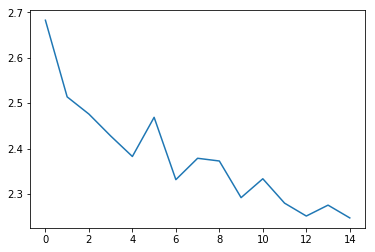

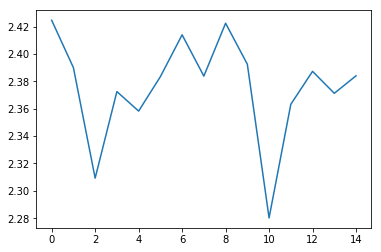

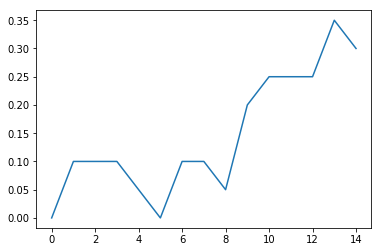

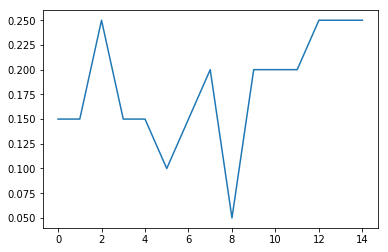

In [26]:
import matplotlib.pyplot as plt
plt.plot(errors_acc)
plt.show()
plt.plot(errors_acc_test)
plt.show()
plt.plot(accuracy)
plt.show()
plt.plot(accuracy_test)
plt.show()

In [24]:
# plt.imshow(kernels[1]-kernels[0])
# plt.show()
kernels[1]

array([[-0.00254336, -0.00988623, -0.00495147,  0.00591325, -0.0096949 ],
       [ 0.00197687,  0.00207609, -0.00789705, -0.00236113, -0.00927048],
       [ 0.00780823,  0.00961842, -0.00880116,  0.00781092,  0.00153803],
       [ 0.00484959,  0.00260368,  0.00163684, -0.00959122, -0.00579947],
       [ 0.0008937 ,  0.0053823 , -0.0049861 , -0.00428209,  0.0070479 ]])